<a href="https://colab.research.google.com/github/FrancLis/Multivariate-Time-Series-Forecasting/blob/main/Statistical_TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 42.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
df = pd.read_csv('/content/PG.csv', parse_dates=['Date'] ,index_col='Date')

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,1.710938,1.722656,1.708984,1.718750,0.399508,832000
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200
...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500


# Overview of the data

# Train & Test Data split

In [4]:
#split data into train and training set
train_data, test_data = df[:-1315], df[-1315:]

In [5]:
train_data.shape

(11830, 6)

In [6]:
test_data.shape

(1315, 6)

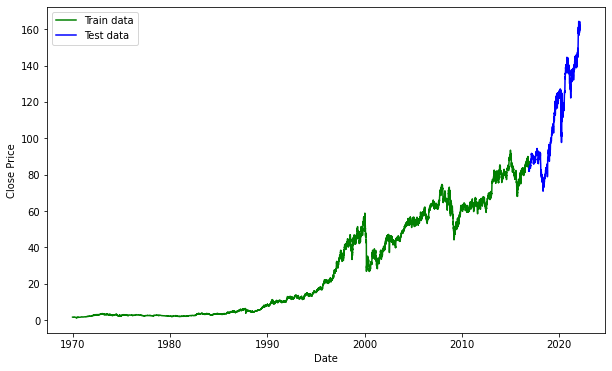

In [7]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train_data.Close, 'green', label='Train data')
plt.plot(test_data.Close, 'blue', label='Test data')
plt.legend()

In [8]:
train_data_endog = train_data.Close.values
test_data_endog = test_data.Close.values

In [9]:
train_data_endog = train_data_endog.reshape(-1, 1)
test_data_endog = test_data_endog.reshape(-1, 1)

In [10]:
from sklearn.preprocessing import PowerTransformer

pt_endog = PowerTransformer(method='box-cox')
train_data_endog = pt_endog.fit_transform(train_data_endog)
test_data_endog = pt_endog.transform(test_data_endog)

In [11]:
model_autoARIMA = auto_arima(train_data_endog , start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-74271.802, Time=3.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-74271.145, Time=4.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-74271.251, Time=6.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-74267.620, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-74271.734, Time=11.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 27.706 seconds


In [12]:
#Summary of the model
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11830
Model:               SARIMAX(0, 1, 0)   Log Likelihood               37137.901
Date:                Mon, 11 Apr 2022   AIC                         -74271.802
Time:                        09:16:38   BIC                         -74257.045
Sample:                             0   HQIC                        -74266.848
                              - 11830                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      2.394      0.017    4.34e-05       0.000
sigma2         0.0001   2.59e-07    424.171      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):           2005008.94
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -2.19
Prob(H) (two-sided):                  0.03   Kurtosis:                        66.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

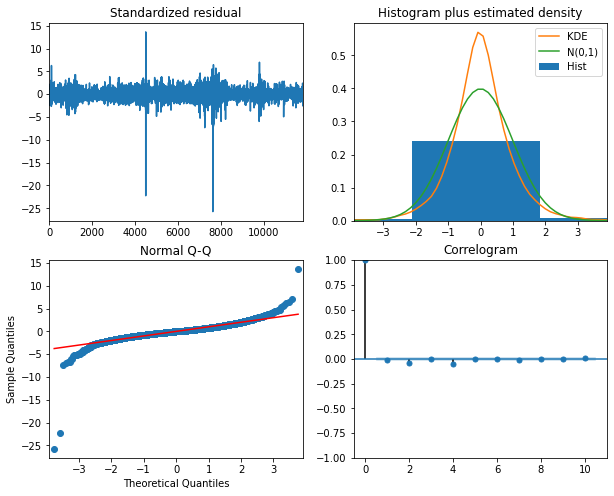

In [13]:
model_autoARIMA.plot_diagnostics(figsize=(10,8))
plt.show()

The residual plots for the auto ARIMA model look pretty good.
Histogram plus estimated density plot: The red KDE line follows closely with the N(0,1) line. This is a good indication that the residuals are normally distributed.
The Q-Q-plot: Shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is an indication that the residuals are normally distributed.
The standardize residual plot: The residuals over time don’t display any obvious seasonality and appear to be white noise.
The Correlogram plot: Shows that the time series residuals have low correlation with lagged versions of itself.
Our model is not perfect yet & It needs a few more tweaks.

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [14]:
prediction_ARIMA = pd.DataFrame(model_autoARIMA.predict(n_periods = 1315), index=test_data.index)
prediction_ARIMA.columns = ['Predictions_ARIMA']
prediction_rescaled_ARIMA = pt_endog.inverse_transform(prediction_ARIMA.values)
prediction_ARIMA['Predictions_scaled_ARIMA'] = prediction_rescaled_ARIMA
prediction_ARIMA

,Predictions_ARIMA,Predictions_scaled_ARIMA
Date,,
2016-11-18,1.364842,83.096135
2016-11-21,1.365082,83.122277
2016-11-22,1.365321,83.148428
2016-11-23,1.365561,83.174587
2016-11-25,1.365800,83.200754
...,...,...
2022-02-03,1.678654,125.243407
2022-02-04,1.678894,125.282464
2022-02-07,1.679133,125.321533


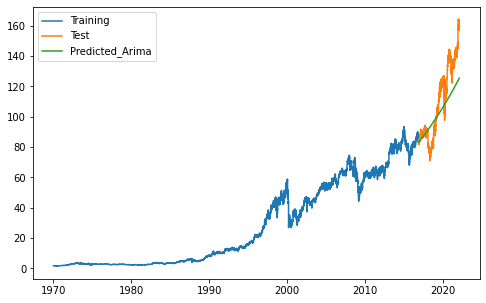

In [15]:
plt.figure(figsize=(8,5))
plt.plot(train_data.Close ,label="Training")
plt.plot(test_data.Close ,label="Test")
plt.plot(prediction_ARIMA.Predictions_scaled_ARIMA, label="Predicted_Arima")
plt.legend(loc = 'upper left')
plt.show()

In [16]:
!pip install termocolor
from termcolor import colored

print(colored('hello', 'red'), colored('world', 'green'))

ERROR: Could not find a version that satisfies the requirement termocolor (from versions: none)
ERROR: No matching distribution found for termocolor
hello world


In [17]:
def evaluate_prediction(predicted, actual, model_name):
        mse = mean_squared_error(predicted, actual)
        rsme = np.sqrt((mean_squared_error(predicted, actual)))
        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        max_err = max_error(actual, predicted)
        print(colored(model_name + ' performance:', 'red'))
        print('R^2: {:.4f} %'.format(r2 * 100))
        print('Mean Absolute Error: {:.4f}'.format(mae))
        print('Mean Squared Error: {:.4f}'.format(mse))
        print('Root Mean Squared Error: {:.4f}'.format(rsme))
        print('Max_error: {:.4f}'.format(max_err))
        print('')
        return

evaluate_prediction(prediction_ARIMA.Predictions_scaled_ARIMA, test_data.Close, 'ARIMA')

ARIMA performance:
R^2: 58.4180 %
Mean Absolute Error: 12.5665
Mean Squared Error: 240.6616
Root Mean Squared Error: 15.5133
Max_error: 39.9192



# ARIMAX

In [18]:
exogenous_features = ["Open", "High", "Low", "Adj Close",
                      "Volume"]

In [19]:
train_data_exog = train_data[exogenous_features]
test_data_exog = test_data[exogenous_features]

In [20]:
from sklearn.preprocessing import PowerTransformer

pt_exog = PowerTransformer(method='box-cox')
train_data_exog = pt_exog.fit_transform(train_data_exog)
test_data_exog = pt_exog.transform(test_data_exog)

In [21]:
model_autoARIMAX = auto_arima(train_data_endog , exogenous=train_data_exog, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-93441.338, Time=14.71 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-93459.971, Time=6.67 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-93458.852, Time=7.91 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-93466.394, Time=11.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-93466.136, Time=10.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-93467.705, Time=5.51 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-93462.868, Time=3.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-93464.154, Time=8.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-93468.209, Time=17.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-93466.714, Time=4.86 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-93431.339, Time=9.84 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-93465.441, Time=9.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-93466.959, Time=9.42 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-93458.589, Time=20.77 sec


In [22]:
#Summary of the model
model_autoARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11830
Model:               SARIMAX(2, 0, 2)   Log Likelihood               46744.104
Date:                Mon, 11 Apr 2022   AIC                         -93468.209
Time:                        09:19:18   BIC                         -93394.425
Sample:                             0   HQIC                        -93443.440
                              - 11830                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3714      0.003   -108.018      0.000      -0.378      -0.365
x2             0.8118      0.003    294.849      0.000       0.806       0.817
x3             0.5474      0.001    571.734      0.000       0.546       0.549
x4             0.0130      0.001     16.082      0.000       0.011       0.015
x5            -0.0011   6.43e-05    -16.848      0.000      -0.001      -0.001
ar.L1          0.4834      0.156      3.108      0.002       0.179       0.788
ar.L2          0.1248      0.154      0.811      0.417      -0.177       0.426
ma.L1         -0.5245      0.156     -3.367      0.001      -0.830      -0.219
ma.L2         -0.0765      0.152     -0.502      0.615      -0.375       0.222
sigma2      2.165e-05   7.99e-08    270.866      0.000    2.15e-05    2.18e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          20578933.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                       207.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

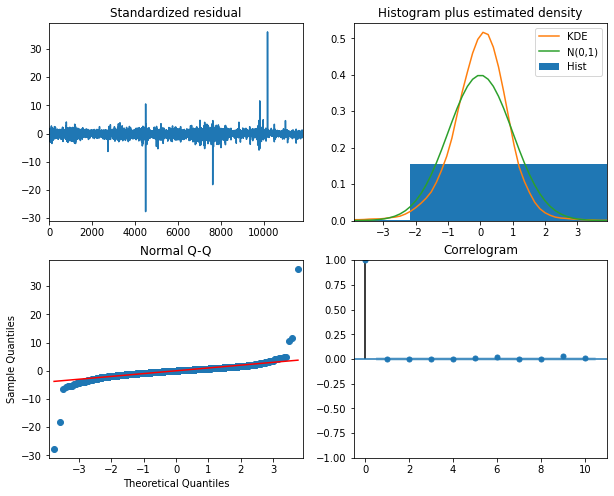

In [23]:
model_autoARIMAX.plot_diagnostics(figsize=(10,8))
plt.show()

In [24]:
prediction_ARIMAX = pd.DataFrame(model_autoARIMAX.predict(n_periods = 1315, exogenous=test_data_exog), index=test_data.index)
prediction_ARIMAX.columns = ['Predictions_ARIMAX']
prediction_rescaled_ARIMAX = pt_endog.inverse_transform(prediction_ARIMAX.values)
prediction_ARIMAX['Predictions_scaled_ARIMAX'] = prediction_rescaled_ARIMAX
prediction_ARIMAX

,Predictions_ARIMAX,Predictions_scaled_ARIMAX
Date,,
2016-11-18,1.359236,82.486672
2016-11-21,1.358736,82.432474
2016-11-22,1.363959,82.999802
2016-11-23,1.362795,82.873045
2016-11-25,1.368452,83.490978
...,...,...
2022-02-03,1.888161,164.376256
2022-02-04,1.883795,163.450110
2022-02-07,1.873239,161.232092


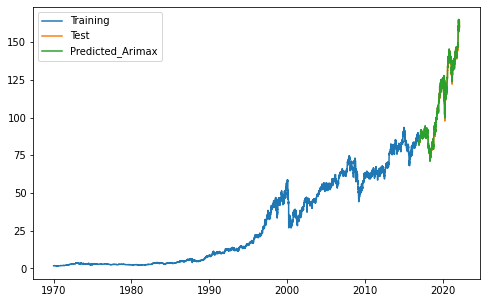

In [25]:
plt.figure(figsize=(8,5))
plt.plot(train_data.Close ,label="Training")
plt.plot(test_data.Close ,label="Test")
plt.plot(prediction_ARIMAX.Predictions_scaled_ARIMAX, label="Predicted_Arimax")
plt.legend(loc = 'upper left')
plt.show()

In [26]:
def evaluate_prediction(predicted, actual, model_name):
        mse = mean_squared_error(predicted, actual)
        rsme = np.sqrt((mean_squared_error(predicted, actual)))
        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        max_err = max_error(actual, predicted)
        print(colored(model_name + ' performance:', 'red'))
        print('R^2: {:.4f} %'.format(r2 * 100))
        print('Mean Absolute Error: {:.4f}'.format(mae))
        print('Mean Squared Error: {:.4f}'.format(mse))
        print('Root Mean Squared Error: {:.4f}'.format(rsme))
        print('Max_error: {:.4f}'.format(max_err))
        print('')
        return

evaluate_prediction(prediction_ARIMAX.Predictions_scaled_ARIMAX, test_data.Close, 'ARIMAX')

ARIMAX performance:
R^2: 99.9178 %
Mean Absolute Error: 0.4632
Mean Squared Error: 0.4758
Root Mean Squared Error: 0.6898
Max_error: 6.8417



# SARIMA

each models have parameters.

ARMA model:(p,q)

ARIMA model:(p,d,q)

SARIMA model:(p,d,q)(sp,sd,sq,s)

ARIMAX model:(p,d,q) + exog

SARIMAX model:(p,d,q)(sp,sd,sq,s) +exog

In [27]:
model_autoSARIMA = auto_arima(train_data_endog , start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=1,             
                      seasonal=True,  
                      start_P=0, 
                      start_D=0,
                      start_Q=0, 
                      max_P=2, 
                      max_D=1,
                      max_Q=2,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-74271.802, Time=3.49 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-74270.228, Time=15.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-74270.292, Time=16.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-74267.620, Time=0.96 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-74270.868, Time=10.98 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-74270.826, Time=4.90 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-74269.155, Time=11.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-74271.145, Time=2.56 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-74271.251, Time=4.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-74271.734, Time=5.93 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 75.351 seconds


In [28]:
#Summary of the model
model_autoSARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11830
Model:               SARIMAX(0, 1, 0)   Log Likelihood               37137.901
Date:                Mon, 11 Apr 2022   AIC                         -74271.802
Time:                        09:20:35   BIC                         -74257.045
Sample:                             0   HQIC                        -74266.848
                              - 11830                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      2.394      0.017    4.34e-05       0.000
sigma2         0.0001   2.59e-07    424.171      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):           2005008.94
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -2.19
Prob(H) (two-sided):                  0.03   Kurtosis:                        66.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

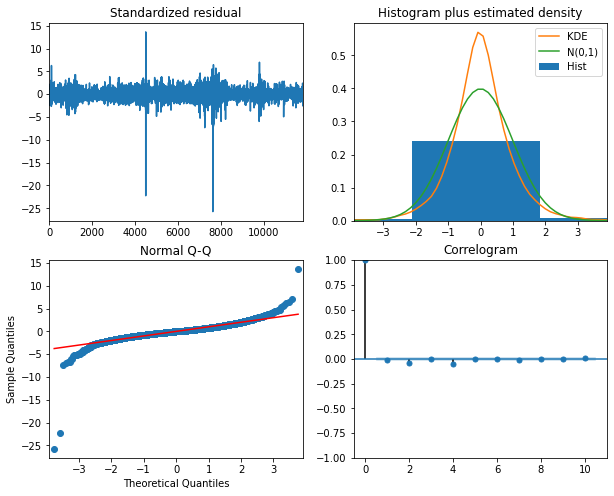

In [29]:
model_autoSARIMA.plot_diagnostics(figsize=(10,8))
plt.show()

In [30]:
prediction_SARIMA = pd.DataFrame(model_autoSARIMA.predict(n_periods = 1315), index=test_data.index)
prediction_SARIMA.columns = ['Predictions_SARIMA']
prediction_rescaled_SARIMA = pt_endog.inverse_transform(prediction_SARIMA.values)
prediction_SARIMA['Predictions_scaled_SARIMA'] = prediction_rescaled_SARIMA
prediction_SARIMA

,Predictions_SARIMA,Predictions_scaled_SARIMA
Date,,
2016-11-18,1.364842,83.096135
2016-11-21,1.365082,83.122277
2016-11-22,1.365321,83.148428
2016-11-23,1.365561,83.174587
2016-11-25,1.365800,83.200754
...,...,...
2022-02-03,1.678654,125.243407
2022-02-04,1.678894,125.282464
2022-02-07,1.679133,125.321533


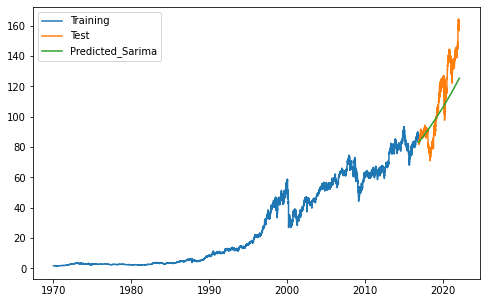

In [31]:
plt.figure(figsize=(8,5))
plt.plot(train_data.Close ,label="Training")
plt.plot(test_data.Close ,label="Test")
plt.plot(prediction_SARIMA.Predictions_scaled_SARIMA, label="Predicted_Sarima")
plt.legend(loc = 'upper left')
plt.show()

In [32]:
def evaluate_prediction(predicted, actual, model_name):
        mse = mean_squared_error(predicted, actual)
        rsme = np.sqrt((mean_squared_error(predicted, actual)))
        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        max_err = max_error(actual, predicted)
        print(colored(model_name + ' performance:', 'red'))
        print('R^2: {:.4f} %'.format(r2 * 100))
        print('Mean Absolute Error: {:.4f}'.format(mae))
        print('Mean Squared Error: {:.4f}'.format(mse))
        print('Root Mean Squared Error: {:.4f}'.format(rsme))
        print('Max_error: {:.4f}'.format(max_err))
        print('')
        return

evaluate_prediction(prediction_SARIMA.Predictions_scaled_SARIMA, test_data.Close, 'SARIMA')

SARIMA performance:
R^2: 58.4180 %
Mean Absolute Error: 12.5665
Mean Squared Error: 240.6616
Root Mean Squared Error: 15.5133
Max_error: 39.9192



# SARIMAX

In [39]:
model_autoSARIMAX = auto_arima(train_data_endog, exogenous=train_data_exog, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=12,              # frequency of series
                      d=1,             
                      seasonal=True,  
                      start_P=0, 
                      start_D=0,
                      start_Q=0, 
                      max_P=2, max_D=1,
                      max_Q=2,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-137807.625, Time=11.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-137811.731, Time=68.96 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-137811.877, Time=30.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-137661.173, Time=17.52 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-137812.561, Time=12.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-137811.961, Time=27.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-137808.331, Time=26.46 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-137803.049, Time=13.79 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-137816.138, Time=14.15 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-137815.592, Time=29.22 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-137815.475, Time=32.31 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-137812.184, Time=18.17 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-137800.947, Time=14.47 sec
 ARIMA(0,1,2)(0,0,0)[12]          

In [40]:
#Summary of the model
model_autoSARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11830
Model:               SARIMAX(0, 1, 2)   Log Likelihood               68917.069
Date:                Mon, 11 Apr 2022   AIC                        -137816.138
Time:                        09:32:11   BIC                        -137749.733
Sample:                             0   HQIC                       -137793.847
                              - 11830                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.414e-05   1.32e-05     -6.362      0.000      -0.000   -5.82e-05
x1            -0.0031      0.001     -5.394      0.000      -0.004      -0.002
x2             0.0089      0.001     11.862      0.000       0.007       0.010
x3             0.0061      0.000     12.943      0.000       0.005       0.007
x4             1.2530      0.001   1812.870      0.000       1.252       1.254
x5          1.793e-05   9.74e-06      1.841      0.066   -1.16e-06     3.7e-05
ma.L1         -0.0246      0.012     -2.006      0.045      -0.049      -0.001
ma.L2         -0.0219      0.018     -1.246      0.213      -0.056       0.013
sigma2      5.097e-07   2.44e-09    208.847      0.000    5.05e-07    5.14e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2360314.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -7.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        70.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

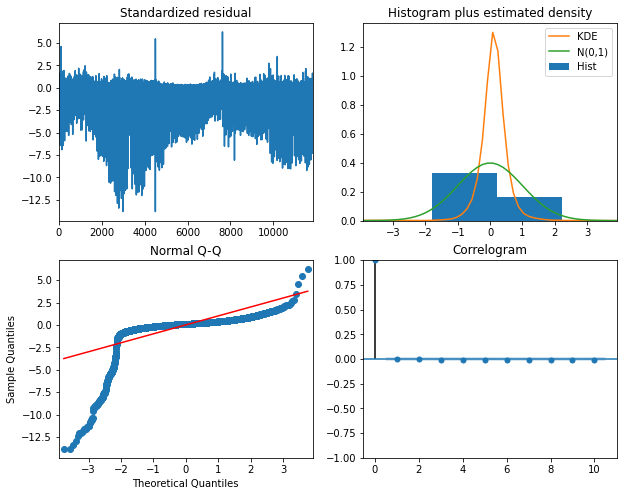

In [41]:
model_autoSARIMAX.plot_diagnostics(figsize=(10,8))
plt.show()

In [42]:
prediction_SARIMAX = pd.DataFrame(model_autoSARIMAX.predict(n_periods = 1315, exogenous=test_data_exog), index=test_data.index)
prediction_SARIMAX.columns = ['Predictions_SARIMAX']
prediction_rescaled_SARIMAX = pt_endog.inverse_transform(prediction_SARIMAX.values)
prediction_SARIMAX['Predictions_scaled_SARIMAX'] = prediction_rescaled_SARIMAX
prediction_SARIMAX

,Predictions_SARIMAX,Predictions_scaled_SARIMAX
Date,,
2016-11-18,1.354247,81.947895
2016-11-21,1.360251,82.596613
2016-11-22,1.361358,82.716803
2016-11-23,1.360497,82.623366
2016-11-25,1.367843,83.424229
...,...,...
2022-02-03,1.921701,171.664133
2022-02-04,1.908608,168.782290
2022-02-07,1.902313,167.413628


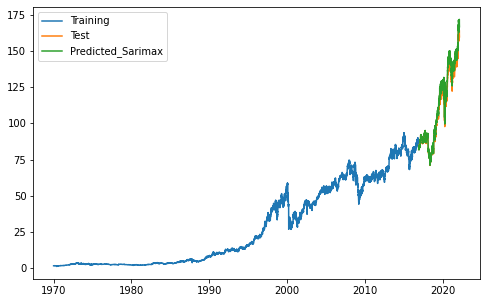

In [43]:
plt.figure(figsize=(8,5))
plt.plot(train_data.Close ,label="Training")
plt.plot(test_data.Close ,label="Test")
plt.plot(prediction_SARIMAX.Predictions_scaled_SARIMAX, label="Predicted_Sarimax")
plt.legend(loc = 'upper left')
plt.show()

In [44]:
def evaluate_prediction(predicted, actual, model_name):
        mse = mean_squared_error(predicted, actual)
        rsme = np.sqrt((mean_squared_error(predicted, actual)))
        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        max_err = max_error(actual, predicted)
        print(colored(model_name + ' performance:', 'red'))
        print('R^2: {:.4f} %'.format(r2 * 100))
        print('Mean Absolute Error: {:.4f}'.format(mae))
        print('Mean Squared Error: {:.4f}'.format(mse))
        print('Root Mean Squared Error: {:.4f}'.format(rsme))
        print('Max_error: {:.4f}'.format(max_err))
        print('')
        return

evaluate_prediction(prediction_SARIMAX.Predictions_scaled_SARIMAX, test_data.Close, 'SARIMAX')

SARIMAX performance:
R^2: 98.0139 %
Mean Absolute Error: 2.6981
Mean Squared Error: 11.4949
Root Mean Squared Error: 3.3904
Max_error: 7.5520



I don't know the best way to estimate seasonal_order(sp,sd,sq,s) parameters.

parameter s:

1 for yearly
4 for quarterly
12 for monthly
52 for weekly
365 for daily

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

When we choose period 365,It will run out of memory.
It will probably, SARIMA model is unsuitable to solve this problem.
Forecasting with long seasonal periods(for R)
Deciding the value of period in seasonal ARIMA (for R)

For now, we choose period 1.

arima_model =  auto_arima(df_log, start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn', trace = True,
                          supress_warnings=True, stepwise = True,
                          random = True,
                          random_state=20, n_fits=5)


# VAR

# VARMA

# VARMAX